In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import re

In [53]:
# Importo el archivo.

df = pd.read_csv("soccer.csv", engine="python")

# Proviene de  https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

In [54]:
# Muestro los primeros 5 valores.

df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis SuÃ¡rez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [55]:
# Quedarme con las columnas que me interesan

df_clean = df[["Name","Nationality","Club","Club_Kit","Rating"]]

df_clean

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar,Brazil,FC Barcelona,11.0,92
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,Wexford Youths,30.0,45
17584,Dylan McGoey,Republic of Ireland,Longford Town,28.0,45
17585,Tommy Ouldridge,England,Swindon Town,32.0,45
17586,Mark Foden,Scotland,Ross County,45.0,45


Text(0, 0.5, 'Nº de jugadores')

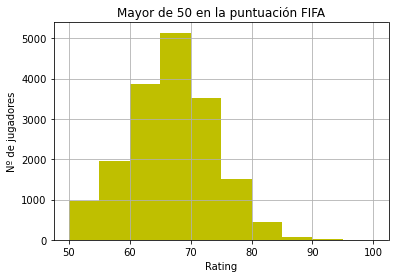

In [56]:
# Gráfico de cómo se distribuyen el nª de jugadores con forme a su clasificación FIFA (a partir de 70 puntos).

df_clean['Rating'].hist(range= (50,100), color="y")
plt.title('Mayor de 50 en la puntuación FIFA')
plt.xlabel('Rating')
plt.ylabel('Nº de jugadores')

Text(0, 0.5, 'Nº de jugadores')

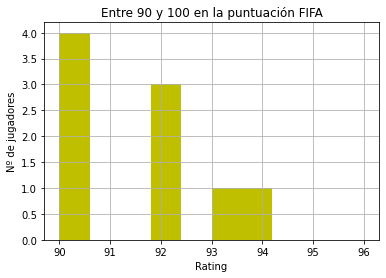

In [57]:
# Gráfico de cómo se distribuyen el nª de jugadores con forme a su clasificación FIFA (de 90 a 96 puntos).

df_clean['Rating'].hist(range= (90,96), color="y")
plt.title('Entre 90 y 100 en la puntuación FIFA')
plt.xlabel('Rating')
plt.ylabel('Nº de jugadores')

In [58]:
df_clean = df_clean[df_clean.Rating>=90]

df_clean

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar,Brazil,FC Barcelona,11.0,92
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan IbrahimoviÄ‡,Sweden,Manchester Utd,9.0,90


In [59]:
df_clean.replace('Neymar', ' "Neymar Jr.')

df_clean

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar,Brazil,FC Barcelona,11.0,92
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan IbrahimoviÄ‡,Sweden,Manchester Utd,9.0,90


In [60]:
df_clean = df_clean.replace('Neymar', 'Neymar Jr.')

df_clean 

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan IbrahimoviÄ‡,Sweden,Manchester Utd,9.0,90


In [61]:
df_clean  = df_clean .replace('Luis SuÃ¡rez', 'Luis Suárez')

df_clean 

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan IbrahimoviÄ‡,Sweden,Manchester Utd,9.0,90


In [62]:
df_clean = df_clean.replace('Zlatan IbrahimoviÄ‡', 'Zlatan Ibrahimović')

df_clean

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan Ibrahimović,Sweden,Manchester Utd,9.0,90


In [64]:
df_clean


,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan Ibrahimović,Sweden,Manchester Utd,9.0,90


In [67]:
df_clean['Club_Kit'] = df_clean['Club_Kit'].astype(int)

df_clean['Club_Kit']

0     7
1    10
2    11
3     9
4     1
5     1
6     9
7    11
8     9
Name: Club_Kit, dtype: int32

In [9]:
df_clean.groupby(['Club'])

df_clean.groupby(['Club']).get_group('FC Barcelona')

,Name,Nationality,Club,Club_Kit,Rating
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar,Brazil,FC Barcelona,11.0,92
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,9.0,92
32,Iniesta,Spain,FC Barcelona,8.0,88
38,Ivan RakitiÄ‡,Croatia,FC Barcelona,4.0,87
41,PiquÃ©,Spain,FC Barcelona,3.0,87
49,Sergio Busquets,Spain,FC Barcelona,5.0,86
51,Jordi Alba,Spain,FC Barcelona,18.0,86
115,Arda Turan,Turkey,FC Barcelona,7.0,84
116,Javier Mascherano,Argentina,FC Barcelona,14.0,84
